In [6]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import os

In [7]:
!pip install kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.0/68.0 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 1.2 MB/s eta 0:00:00a 0:00:01


In [330]:
df = pd.read_csv('clean_jobs.csv')

In [14]:
print("Data Related Infos will be shown below as: ")

def df_info(df):
    print("Data Shape is like: ", df.shape)
    print("Column types are: ")
    float_col = [col for col in df.columns if df[col].dtype == np.float64]
    int_col = [col for col in df.columns if df[col].dtype == np.int64 ]
    obj_col = [col for col in df.columns if df[col].dtype == np.object_]
    date_col = [col for col in df.columns if col not in float_col and col not in int_col and col not in obj_col ]
    
    """
    if len(date_col) == 0:
        print("Date type column: None Found")
    else:
        print("Date type columns: ", len(date_col), "-", date_col)
    """
    
    print("\nFloat type columns: ", float_col)
    print("Integer type columns: ", int_col)
    print("Object type columns: ", obj_col)
    print("Date type columns: ", date_col if date_col else "None Found")

    #will return the column names that got null value 
    print("\nColumn names that got N/A value in it: ")
    na_only_col = df.columns[df.isnull().all()].tolist()
    print(na_only_col)

df_info(df)

Data Related Infos will be shown belos as: 
Data Shape is like:  (618, 10)
Column types are: 

Float type columns:  ['work_type', 'employment_type']
Integer type columns:  ['id']
Object type columns:  ['title', 'company', 'location', 'link', 'source', 'date_posted', 'description']
Date type columns:  None Found

Column names that got N/A value in it: 
['work_type', 'employment_type']


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,618.0,761.83657,465.114626,1.0,415.25,672.5,1229.75,1536.0
work_type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
employment_type,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
def dropping_na_values_column(df):
    na_val_only = [col for col in df.columns[df.isnull().all()].to_list()]
    return df.drop(columns=na_val_only, inplace=True)
dropping_na_values_column(df)

In [17]:
# converting date_posted object > datetime then breaking it down into 3 pieces

try:
    df['date_posted'] = pd.to_datetime(df['date_posted'])
except ValueError as e:
    print(f"error be like: {e}") 

# now lets break it down and create regarding columns
def breaking_the_column_down(df):
    try:
        df['Year'] = df['date_posted'].dt.year
        df['Month'] = df['date_posted'].dt.month
        df['Day'] = df['date_posted'].dt.day
    except ValueError as e:
        print(f"error be like: {e}")

breaking_the_column_down(df)

In [18]:
df.drop(columns='date_posted',inplace=True)

In [19]:
df[df.duplicated()]

,id,title,company,location,link,source,description,Year,Month,Day


In [20]:
df.drop(columns=['source','link'],inplace=True)

In [21]:
df.head()

,id,title,company,location,description,Year,Month,Day
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16


In [24]:
# let's analyse the location and create regardless columns such as state,country etc

a = pd.Series(df.location.unique())
with open(csv_path, "w", encoding="utf-8") as f:
    for title in a:
        f.write(f"{title}\n")

# using this library to get info
from py_countries_states_cities_database import (
        get_all_cities,
        get_all_states,
        get_all_countries,
        get_all_sub_regions,
        get_all_regions,
        get_all_states_and_cities_nested,
        get_all_countries_and_states_nested,
        get_all_countries_and_cities_nested,
        get_file_path
    )
    
countries = get_all_countries()
countries_df = pd.DataFrame(countries)
countries_df_unq = countries_df['name'].unique().tolist()

usa_states = get_all_states()
usa_states_df = pd.DataFrame(usa_states)
only_usa_state_names = usa_states_df.query("country_name == 'United States' ")
only_usa_state_names = only_usa_state_names['state_code'].tolist()
only_usa_state_names

# now lets specify which one is country and which one is states

def extract_country(df):
    try:
        parts = [p.strip() for p in df.split(',')]
        if parts[-1] in countries_df_unq:
            return parts[-1]
        elif parts[-1] in only_usa_state_names:
            return 'United States'
        else:
            return None # we'll be looking into that later as we move on
    except ValueError as e:
        print(f"error be like: {e}")

df['country'] = df['location'].apply(extract_country)
df.head()


,id,title,company,location,description,Year,Month,Day,country
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14,United States
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14,United States
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14,United States
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14,United States
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16,United States


In [25]:
# 'Metropolitan Area', 'Baltimore Area', 'Area', 'Greater', 'Metropolitan Region', 'SAR' those are needs to be eliminated

remove_words = [
    'Metropolitan Area',
    'Baltimore Area',
    'Area',
    'Metropolitan Region',
    'SAR',
    'Greater'
]

import re 
# pattern
pattern = r'\b(?:' + '|'.join(re.escape(word) for word in remove_words) + r')\b'

df['location'] = df['location'].str.replace(pattern, '', regex=True).str.strip()


In [26]:
# create a copy 
df_copy = df.copy()

In [27]:
df_copy.query("country.isnull()")

,id,title,company,location,description,Year,Month,Day,country
16,34,Customer Relationship Management Analyst,Bvlgari,New York City,Job Overview:\n\nWe are looking for a highly s...,2025,4,11,None
29,65,People Data Analyst,CAVA,Washington DC-,Company Profile:\n\nAt CAVA we make it delicio...,2025,4,16,None
47,83,Data Analyst,AARATECH,New York City,Overview:\n\nThe Data Analyst is tasked with c...,2025,4,14,None
72,117,Data Analyst,Adecco,Bengaluru,"Hi All,\n\n\n\n\nLooking for Immediate joiner\...",2025,4,15,None
81,131,Analista de Dados Júnior | Data Viz,americanas s.a.,Rio de Janeiro,Job Description\n\nCom uma trajetória de 95 an...,2025,4,15,None
100,152,Healthcare Data Analyst,Sogeti,Minneapolis-St. Paul,Sogeti is a leading provider of professional t...,2025,4,15,None
113,299,Data Analyst,Amplytics,San Francisco Bay,Position Overview:\n\nWe are seeking an experi...,2025,4,17,None
144,405,Data Scientist,NielsenIQ,Lisbon,Job Description\n\nAbout the Team\n\nWe are a ...,2025,4,14,None
156,417,Junior Artificial Intelligence (AI) / Machine ...,PingWind Inc. (SDVOSB),Washington DC-,"Location: Hybrid (some travel to Washington, D...",2025,4,16,None
164,426,Machine Learning Engineer,Capgemini,Bengaluru,• Basic understanding of machine learning fram...,2025,4,16,None


In [28]:
df_copy['location'] = df_copy['location'].str.replace('-', '', regex=True).str.strip()


In [29]:
# Metroplex, Hong Kong, Hong Kong

df_copy['location'] = df_copy['location'].str.replace('Metroplex','').replace('Hong Kong, Hong Kong', 'Hong Kong').str.strip()

In [30]:
df_copy['location'] = df_copy['location'].str.replace('MinneapolisSt. Paul','Minneapolis').replace('DallasFort Worth', 'Dallas-Fort Worth').str.strip()

In [31]:
df_copy[df_copy.country.isnull()]

,id,title,company,location,description,Year,Month,Day,country
16,34,Customer Relationship Management Analyst,Bvlgari,New York City,Job Overview:\n\nWe are looking for a highly s...,2025,4,11,None
29,65,People Data Analyst,CAVA,Washington DC,Company Profile:\n\nAt CAVA we make it delicio...,2025,4,16,None
47,83,Data Analyst,AARATECH,New York City,Overview:\n\nThe Data Analyst is tasked with c...,2025,4,14,None
72,117,Data Analyst,Adecco,Bengaluru,"Hi All,\n\n\n\n\nLooking for Immediate joiner\...",2025,4,15,None
81,131,Analista de Dados Júnior | Data Viz,americanas s.a.,Rio de Janeiro,Job Description\n\nCom uma trajetória de 95 an...,2025,4,15,None
100,152,Healthcare Data Analyst,Sogeti,Minneapolis,Sogeti is a leading provider of professional t...,2025,4,15,None
113,299,Data Analyst,Amplytics,San Francisco Bay,Position Overview:\n\nWe are seeking an experi...,2025,4,17,None
144,405,Data Scientist,NielsenIQ,Lisbon,Job Description\n\nAbout the Team\n\nWe are a ...,2025,4,14,None
156,417,Junior Artificial Intelligence (AI) / Machine ...,PingWind Inc. (SDVOSB),Washington DC,"Location: Hybrid (some travel to Washington, D...",2025,4,16,None
164,426,Machine Learning Engineer,Capgemini,Bengaluru,• Basic understanding of machine learning fram...,2025,4,16,None


In [32]:
!pip install pycountry

  Using cached pycountry-24.6.1-py3-none-any.whl.metadata (12 kB)
Using cached pycountry-24.6.1-py3-none-any.whl (6.3 MB)


In [35]:
# as what we have as None in country column we see some of them is country and some of them is state
# so I'll use manual mapping for this case

import pycountry 

manual_map = {
    "New York City": "United States",
    "Washington DC": "United States",
    "Bengaluru": "India",
    "Rio de Janeiro": "Brazil",
    "Minneapolis St. Paul": "United States",
    "San Francisco Bay": "United States",
    "Lisbon": "Portugal",
    "Porto": "Portugal",
    "Chicago": "United States",
    "Bangkok": "Thailand",
    "UticaRome": "United States",
    "Kolkata": "India",
    "Istanbul": "Turkey",
    "Dallas-Fort Worth": "United States",
    "Salt Lake City": "United States",
    "Columbus, Ohio": "United States",
    "St. Louis": "United States",
    "Mumbai": "India",
    "Hong Kong": "Hong Kong", 
    "Coventry": "United Kingdom",
    "Jakarta": "Indonesia",
    "Des Moines": "United States"
} 


def get_left_none_country_infos(location):
    if pd.isna(location):
        return None
    # first looking into manual matching
    for key in manual_map:
        if key.lower() in location.lower():
            return manual_map[key]
    # then ask pycountry
    for country in pycountry.countries:
        if country.name.lower() in location.lower():
            return country.name
        if hasattr(country, 'official_name') and country.official_name.lower() in location.lower():
            return country.name
    return None

df_copy['country'] = df_copy.apply(lambda row: get_left_none_country_infos(row['location']) if pd.isna(row['country']) else row['country'], axis=1)

In [36]:
df_copy[df_copy.country.isnull()]

,id,title,company,location,description,Year,Month,Day,country
100,152,Healthcare Data Analyst,Sogeti,Minneapolis,Sogeti is a leading provider of professional t...,2025,4,15,None


In [37]:
df_copy.loc[df_copy['country'].isnull(), 'country'] = 'US'

In [38]:
df_copy[df_copy.country.isnull()]

,id,title,company,location,description,Year,Month,Day,country


In [39]:
!pip install geopy

  Using cached geopy-2.4.1-py3-none-any.whl.metadata (6.8 kB)
  Using cached geographiclib-2.0-py3-none-any.whl.metadata (1.4 kB)
Using cached geopy-2.4.1-py3-none-any.whl (125 kB)
Using cached geographiclib-2.0-py3-none-any.whl (40 kB)


In [40]:
!pip install googlemaps

  Using cached googlemaps-4.10.0.tar.gz (33 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for googlemaps: filename=googlemaps-4.10.0-py3-none-any.whl size=40717 sha256=c3e6d78c07932381de1edb218025422aa353e1fd463397e65556068e6865ffac
  Stored in directory: /Users/umutcandegirmenci/Library/Caches/pip/wheels/17/f8/79/999d5d37118fd35d7219ef57933eb9d09886c4c4503a800f84
Successfully built googlemaps


In [44]:
df.head()

,id,title,company,location,description,Year,Month,Day,country
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14,United States
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14,United States
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14,United States
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14,United States
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16,United States


In [48]:
# lets add location_only column

df_copy['location_only'] = df_copy['location'].str.split(',').str[0]

df_copy.head()

,id,title,company,location,description,Year,Month,Day,country,location_only
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14,United States,New York
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,San Francisco
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,Los Angeles
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14,United States,Washington
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16,United States,Chicago


In [52]:
df_copy.isnull().sum()

id               0
title            0
company          0
location         0
description      4
Year             0
Month            0
Day              0
country          0
location_only    0
dtype: int64

In [53]:
df_copy.title.unique()

array(['Data Analyst', 'Data Analyst II',
       'Data Analyst, Production Finance Operations & Innovation',
       'Data Analyst - Marketing',
       'Data Analyst, Global Partnerships & Content',
       'Senior Data Analyst', 'Data Products Analyst, YouTube',
       'Customer Relationship Management Analyst',
       'Data Analyst - SQL, ERP', 'Marketing Data Analyst',
       'Analytics Associate', 'Data Analyst I',
       'Data & Analytics, Analyst', 'Junior Data Analyst - Remote',
       'People Data Analyst', 'Customer Insights Analyst',
       'Data Analyst Intern (Fall start)', 'Analyst, Data Science, RMBS',
       'Analyst', 'Business Data Analyst', 'Junior Data Analyst',
       'Healthcare Data Analyst I - Remote', 'Data Analyst - 100% Remote',
       'Insights Analyst', 'Sr. Data Analyst', 'Data Analyst Contractor',
       'Analyst, Data Analytics & Intelligence',
       'Analista de Dados Junior - São Paulo/SP',
       'Data Platform Analyst, Subscriptions', 'Healthcare Data 

In [67]:
# let's try to analyse and break down the values and retrieve only job posting title.
df_title_only = df_copy['title']
df_title_only.head()

df_title_only = pd.DataFrame(df_title_only)
df_title_only.head()
    

,title
0,Data Analyst
1,Data Analyst
2,Data Analyst
3,Data Analyst
4,Data Analyst II


In [69]:
# removing by comma worked, seems so, but still not what I want to see, too long tho!
df_title_only['remain_title'] = df_title_only['title'].str.split(',').str.get(0)

df_title_only.remain_title.unique()

array(['Data Analyst', 'Data Analyst II', 'Data Analyst - Marketing',
       'Senior Data Analyst', 'Data Products Analyst',
       'Customer Relationship Management Analyst', 'Data Analyst - SQL',
       'Marketing Data Analyst', 'Analytics Associate', 'Data Analyst I',
       'Data & Analytics', 'Junior Data Analyst - Remote',
       'People Data Analyst', 'Customer Insights Analyst',
       'Data Analyst Intern (Fall start)', 'Analyst',
       'Business Data Analyst', 'Junior Data Analyst',
       'Healthcare Data Analyst I - Remote', 'Data Analyst - 100% Remote',
       'Insights Analyst', 'Sr. Data Analyst', 'Data Analyst Contractor',
       'Analista de Dados Junior - São Paulo/SP', 'Data Platform Analyst',
       'Healthcare Data Analyst', 'Junior Data Analyst UK&I',
       'Lead Data Analyst (Power BI', 'Officer - Real Time Analytics',
       'ANALISTA GESTAO DE INDICADORES PL', 'DATA ANALYST I',
       'Data Analytics', 'Analista de Dados Júnior | Data Viz',
       'Analyst-Da

In [71]:
# seems ok it was just a fake df to work on, now let's implement on the real data set and move on
raw = df_title_only['remain_title']

df_title_only['title_cleaned'] = df_title_only['remain_title'].str.strip().str.extract(r'^([^-(|]+)')[0].str.strip()

df_title_only.title_cleaned.unique()

array(['Data Analyst', 'Data Analyst II', 'Senior Data Analyst',
       'Data Products Analyst',
       'Customer Relationship Management Analyst',
       'Marketing Data Analyst', 'Analytics Associate', 'Data Analyst I',
       'Data & Analytics', 'Junior Data Analyst', 'People Data Analyst',
       'Customer Insights Analyst', 'Data Analyst Intern', 'Analyst',
       'Business Data Analyst', 'Healthcare Data Analyst I',
       'Insights Analyst', 'Sr. Data Analyst', 'Data Analyst Contractor',
       'Analista de Dados Junior', 'Data Platform Analyst',
       'Healthcare Data Analyst', 'Junior Data Analyst UK&I',
       'Lead Data Analyst', 'Officer',
       'ANALISTA GESTAO DE INDICADORES PL', 'DATA ANALYST I',
       'Data Analytics', 'Analista de Dados Júnior', 'Sr Data Analyst',
       'Analista de Business Intelligence Júnior', 'Data Associate',
       'Analista de Análise de Dados Junior', 'Data analyst',
       'Data Intern', 'Jr. Data & BI Analyst', 'Data Scientist',
       'F

In [72]:
df_copy.head()

,id,title,company,location,description,Year,Month,Day,country,location_only
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14,United States,New York
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,San Francisco
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,Los Angeles
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14,United States,Washington
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16,United States,Chicago


In [84]:
#df_copy['title_cleaned'] = df_copy['title'].str.strip(',').str.extract(r'^([^-(|]+@)')[0].str.strip()
df_copy['first_title'] = df_copy['title'].str.split(',').str[0]
df_copy.head()

,id,title,company,location,description,Year,Month,Day,country,location_only,first_title
0,1,Data Analyst,Meta,"New York, NY",The Social Measurement team is a growing team ...,2025,4,14,United States,New York,Data Analyst
1,2,Data Analyst,Meta,"San Francisco, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,San Francisco,Data Analyst
2,3,Data Analyst,Meta,"Los Angeles, CA",The Social Measurement team is a growing team ...,2025,4,14,United States,Los Angeles,Data Analyst
3,4,Data Analyst,Meta,"Washington, DC",The Social Measurement team is a growing team ...,2025,4,14,United States,Washington,Data Analyst
4,5,Data Analyst II,Pinterest,"Chicago, IL",About Pinterest\n\nMillions of people around t...,2025,4,16,United States,Chicago,Data Analyst II


In [87]:
df_copy['title_cleaned'] = df_copy['first_title'].str.strip().str.extract(r'^([^-(|]+)')[0].str.strip()

In [89]:
df.drop(columns='first_title', inplace = True)

KeyError: "['first_title'] not found in axis"

In [97]:
#df_copy[df_copy.isnull().any(axis=1)]
df_copy.loc[df_copy['title_cleaned'].isnull(), 'title_cleaned'] = 'Data Engineer'

In [99]:
df_copy.isnull().sum()

id               0
title            0
company          0
location         0
description      4
Year             0
Month            0
Day              0
country          0
location_only    0
first_title      0
title_cleaned    0
dtype: int64

In [105]:
df_copy.drop(columns='first_title', inplace=True)

In [108]:
df_copy.drop(columns='description', inplace=True)

In [109]:
df_copy.head()

,id,title,company,location,Year,Month,Day,country,location_only,title_cleaned
0,1,Data Analyst,Meta,"New York, NY",2025,4,14,United States,New York,Data Analyst
1,2,Data Analyst,Meta,"San Francisco, CA",2025,4,14,United States,San Francisco,Data Analyst
2,3,Data Analyst,Meta,"Los Angeles, CA",2025,4,14,United States,Los Angeles,Data Analyst
3,4,Data Analyst,Meta,"Washington, DC",2025,4,14,United States,Washington,Data Analyst
4,5,Data Analyst II,Pinterest,"Chicago, IL",2025,4,16,United States,Chicago,Data Analyst II


    location_only      title_cleaned  count
240      New York       Data Analyst     13
180        London      Data Engineer      5
194   Los Angeles       Data Analyst      3
79        Chicago     AI/ML Engineer      2
156      Istanbul  Jr. Data Engineer      1


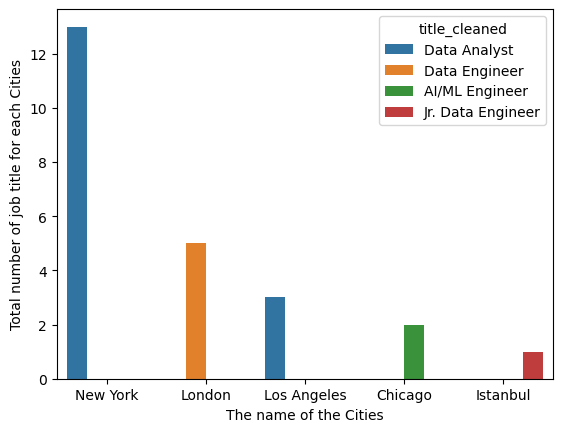

<Figure size 640x480 with 0 Axes>

In [153]:
# now let's see some number and graphs. 

# Let's see which job title was at its peak for hiring by companies in New York, London, Istanbul, LA, Chicago

import warnings
warnings.filterwarnings('ignore')

title_each_country = df_copy.groupby(['location_only','title_cleaned']).size().reset_index(name='count')
title_each_country_df = pd.DataFrame(title_each_country)

states = ['New York', 'London', 'Istanbul', 'Los Angeles', 'Chicago']

selected_locations_only = title_each_country_df.query(" location_only in  @states ")
selected_locations_only

selected_locations_only['rank'] = selected_locations_only.groupby('location_only')['count'].rank(method='first', ascending=False)
selected_locations_only

top_titles_per_loc = selected_locations_only.query(" rank == 1")
top_titles_per_loc = top_titles_per_loc[['location_only','title_cleaned', 'count']].sort_values(by='count', ascending=False)
print(top_titles_per_loc)


x = sns.barplot(data= top_titles_per_loc, x = 'location_only', y = 'count', hue = 'title_cleaned')
plt.xlabel('The name of the Cities')
plt.ylabel('Total number of job title for each Cities')
plt.show()
plt.tight_layout()


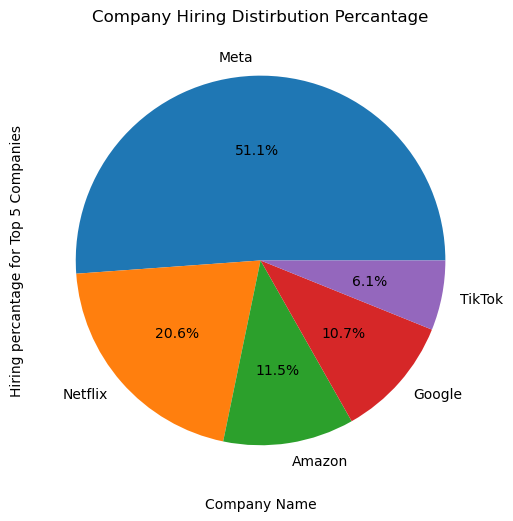

In [198]:
# which company is in hiring peak

company_hiring_peak = df_copy.groupby(['company']).size().reset_index(name='count')
company_hiring_peak = company_hiring_peak.sort_values(by='count', ascending=False)
for_chart = company_hiring_peak.head().set_index('company')

# lets put in pie chart
pie = for_chart.plot(kind='pie', y='count', autopct='%1.1f%%', legend=False, 
                     labels=for_chart.index
                    ,figsize=(10,6))
plt.title('Company Hiring Distirbution Percantage')
plt.xlabel('Company Name')
plt.ylabel('Hiring percantage for Top 5 Companies')
plt.show()

In [197]:
df_copy.head()

,id,title,company,location,Year,Month,Day,country,location_only,title_cleaned
0,1,Data Analyst,Meta,"New York, NY",2025,4,14,United States,New York,Data Analyst
1,2,Data Analyst,Meta,"San Francisco, CA",2025,4,14,United States,San Francisco,Data Analyst
2,3,Data Analyst,Meta,"Los Angeles, CA",2025,4,14,United States,Los Angeles,Data Analyst
3,4,Data Analyst,Meta,"Washington, DC",2025,4,14,United States,Washington,Data Analyst
4,5,Data Analyst II,Pinterest,"Chicago, IL",2025,4,16,United States,Chicago,Data Analyst II


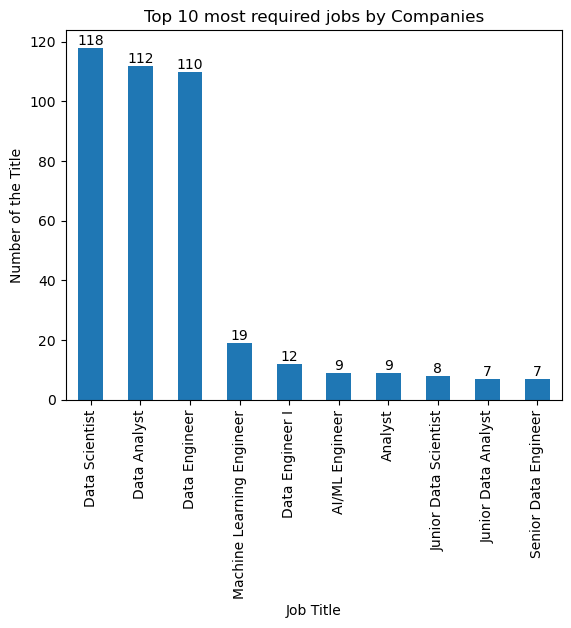

In [224]:
# what's top 10 required job position

req_position = df_copy.groupby('title_cleaned').size().reset_index(name='count')
req_pos = req_position.sort_values(by='count', ascending=False)
x = req_pos.head(10)


g = x.plot(kind='bar', x = 'title_cleaned', legend=False)


# Çubuklar üzerine sayısal değerleri ekle
for p in g.patches:
    height = p.get_height()
    g.annotate(f'{int(height)}', 
               (p.get_x() + p.get_width() / 2., height),
               ha='center', va='bottom', fontsize=10)

plt.title("Top 10 most required jobs by Companies")
plt.xlabel('Job Title')
plt.ylabel("Number of the Title")
plt.show()

In [222]:
df_copy.head()

,id,title,company,location,Year,Month,Day,country,location_only,title_cleaned
0,1,Data Analyst,Meta,"New York, NY",2025,4,14,United States,New York,Data Analyst
1,2,Data Analyst,Meta,"San Francisco, CA",2025,4,14,United States,San Francisco,Data Analyst
2,3,Data Analyst,Meta,"Los Angeles, CA",2025,4,14,United States,Los Angeles,Data Analyst
3,4,Data Analyst,Meta,"Washington, DC",2025,4,14,United States,Washington,Data Analyst
4,5,Data Analyst II,Pinterest,"Chicago, IL",2025,4,16,United States,Chicago,Data Analyst II


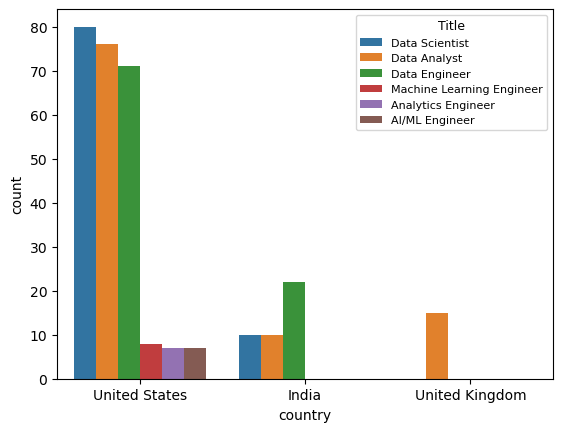

In [248]:
# see the title situation for each country - Top 10

country = df_copy.groupby('country')['title_cleaned'].value_counts().reset_index(name='count').sort_values(by='count',ascending=False)
ch = country.head(10)

fig = sns.barplot(data = ch, x = 'country', y = 'count', hue = 'title_cleaned')
plt.legend(title='Title', loc='upper right', bbox_to_anchor=(1,1), fontsize=8, title_fontsize=9)
plt.show()


In [274]:
# see the months situation for country and the location as well 

months = df_copy.groupby(['Month','country']).size().reset_index(name='count')
months_for4 = months.query("Month == 4").sort_values(by='count', ascending=False)
for4 = months_for4.head()

months_for5 = months.query("Month == 5").sort_values(by='count', ascending=False)
for5 = months_for5.head()

combined = pd.concat([for4, for5])
print("Country job distribution by Month")
print(combined)

months_loc = df_copy.groupby(['Month','location_only']).size().reset_index(name='count')
months_loc4 = months_loc.query("Month == 4").sort_values(by='count', ascending=False)
loc_for4 = months_loc4.head()

months_loc5 = months_loc.query("Month == 5").sort_values(by='count', ascending=False)
loc_for5 = months_loc5.head()

loc_combined = pd.concat([loc_for4, loc_for5])
print("Location job distribution by Month")
print(loc_combined)

Country job distribution by Month
    Month         country  count
26      4   United States    206
7       4           India     50
25      4  United Kingdom     25
0       4          Brazil     10
8       4       Indonesia      6
52      5   United States    178
34      5           India     36
51      5  United Kingdom     16
28      5          Brazil     10
29      5          Canada      5
Location job distribution by Month
     Month  location_only  count
73       4       New York     36
11       4      Bengaluru     27
110      4  United States     27
91       4  San Francisco     19
104      4      Sunnyvale     10
230      5  United States     36
199      5       New York     27
214      5  San Francisco     18
127      5      Bengaluru     10
194      5         Mumbai      6


In [276]:
!pip install plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.0/358.0 kB 2.5 MB/s eta 0:00:00a 0:00:01


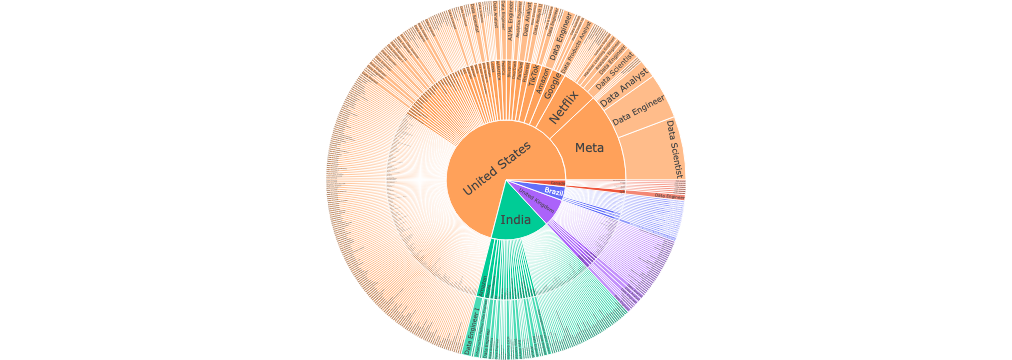

In [278]:
# top 5 countries
top_countries = df_copy['country'].value_counts().head(5).index
df_filtered = df_copy[df_copy['country'].isin(top_countries)]

# sunburst
fig = px.sunburst(
    df_filtered,
    path=['country', 'company', 'title_cleaned'],
    color='country'
)
fig.update_layout(margin=dict(t=0, l=0, r=0, b=0))
fig.show()

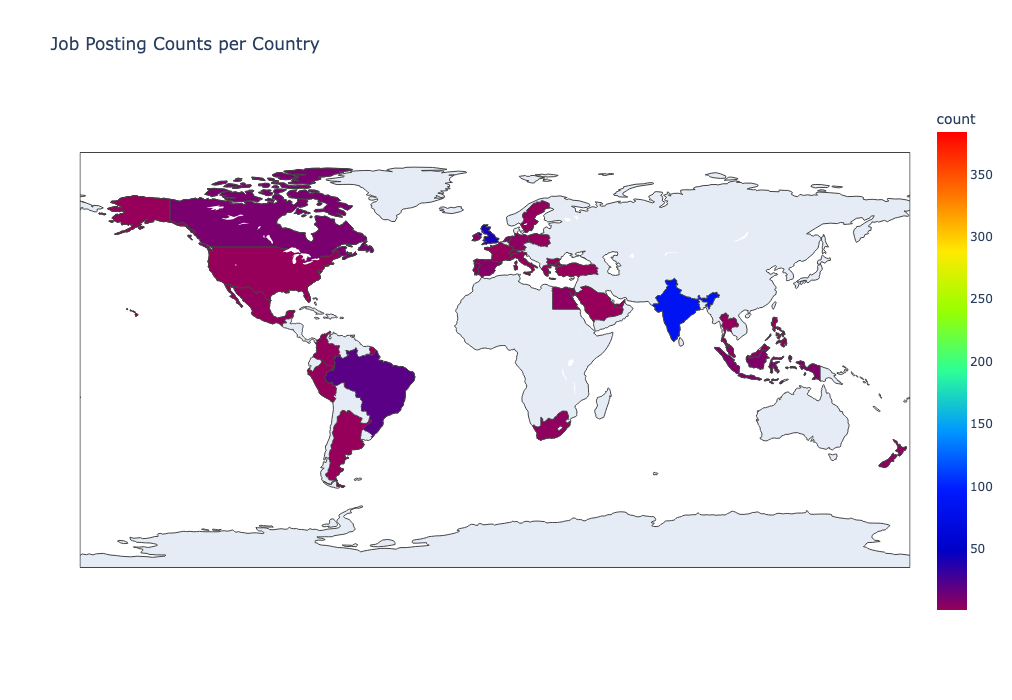

In [302]:
# lets see country counts on a map

# job posting in each country
country_counts = df_copy['country'].value_counts().reset_index()
country_counts

# mapping
fig = px.choropleth(
    country_counts,
    locations='country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Rainbow',
    title='Job Posting Counts per Country'
)
fig.update_layout(
    width = 1000,
    height = 700,
     )
fig.show()

In [381]:
# Let's examine the percentage of Data Analyst,Engineer, Scientist roles among all job listings.
pattern = r'\b(?:fraud|jr.|senior|junior|sql|sr.|people|healthcare|customer)?\s*data\s(analyst|engineer|scientist)\b'

df_copy['data_title_model'] = df_copy['title_cleaned'].str.contains(pattern, case=False, regex=True)
df_copy.head()

# lets see some info about the data title modeling matching

print("Data Modeling Information\n")
print("Percentage of matching modeling: ", round(data_title_model.mean()*100,2), "%")
print("Total number of matching modeling: ", data_title_model.sum())
print("Matching records are shown below: \n")
df_copy.loc[data_title_model, 'title_cleaned'].value_counts()

# let's see junior and senior disturbiton

sr_jr = df_copy.loc[data_title_model, 'title_cleaned'].value_counts().reset_index(name='count')
pattern_for_junior = r'\b(jr.|junior)\s\b'
jr = sr_jr['title_cleaned'].str.contains(pattern_for_junior, case=False, regex= True)
print("Junior Dist: ", round(jr.mean()*100,2 ),'%')
print("Total Junior Job Listing number is: ", jr.sum())

pattern_for_senior = r'\b(sr.|senior)\s\b'
sr = sr_jr['title_cleaned'].str.contains(pattern_for_senior, case=False, regex= True)
print("Senior Dist: ", round(sr.mean()*100,2),'%')
print("Total Senior Job Listing number is: ", sr.sum())

# lets see those numbers in a df
for_pie = {
    'Role' : ['Junior','Senior'],
    'Percantage': [f"{round(jr.mean()*100,2)}%", f"{round(sr.mean()*100, 2)}%"]
}

for_pie = pd.DataFrame(for_pie)
for_pie

Data Modeling Information

Percentage of matching modeling:  8.74 %
Total number of matching modeling:  54
Matching records are shown below: 

Junior Dist:  39.13 %
Total Junior Job Listing number is:  9
Senior Dist:  30.43 %
Total Senior Job Listing number is:  7


,Role,Percantage
0,Junior,39.13%
1,Senior,30.43%


In [391]:
df_copy.shape

(618, 11)

In [394]:
# pulled as csv
x = df_copy.iloc[:,:-1]
x.to_csv("new_linkedlin_data.csv", index=False)

In [404]:
# pulled as excel
y = df_copy.iloc[:,:-1]
y.to_excel("new_linkedlin_data2.xlsx", index=False)